<a href="https://colab.research.google.com/github/ankitananwani/anomaly_detection/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
print("Welcome to Group 20 Applied Machine Learning assignment on Anomaly Detection!")

Welcome to Group 20 Applied Machine Learning assignment on Anomaly Detection!


**Pre-reqs:**

1.   Python version >= 3.7
2.   Scikit-Learn >= 1.0.1



In [10]:
#Check Python Version
import sys
assert sys.version_info >= (3,7)

#Check Scikit version
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**Get the Data**

In [11]:
import pandas as pd

data = pd.read_csv("sample_data/data/Anamoly.csv")


# New Section

**Let's look at the first 2 records of the data**

In [12]:
pd.set_option('display.max_columns', None)
data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


**Let's take a quick look at the data structure**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

**Let's look at the data statistics for each column**

In [14]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Let's look at the histogram visualizations for each attribute of the data set**

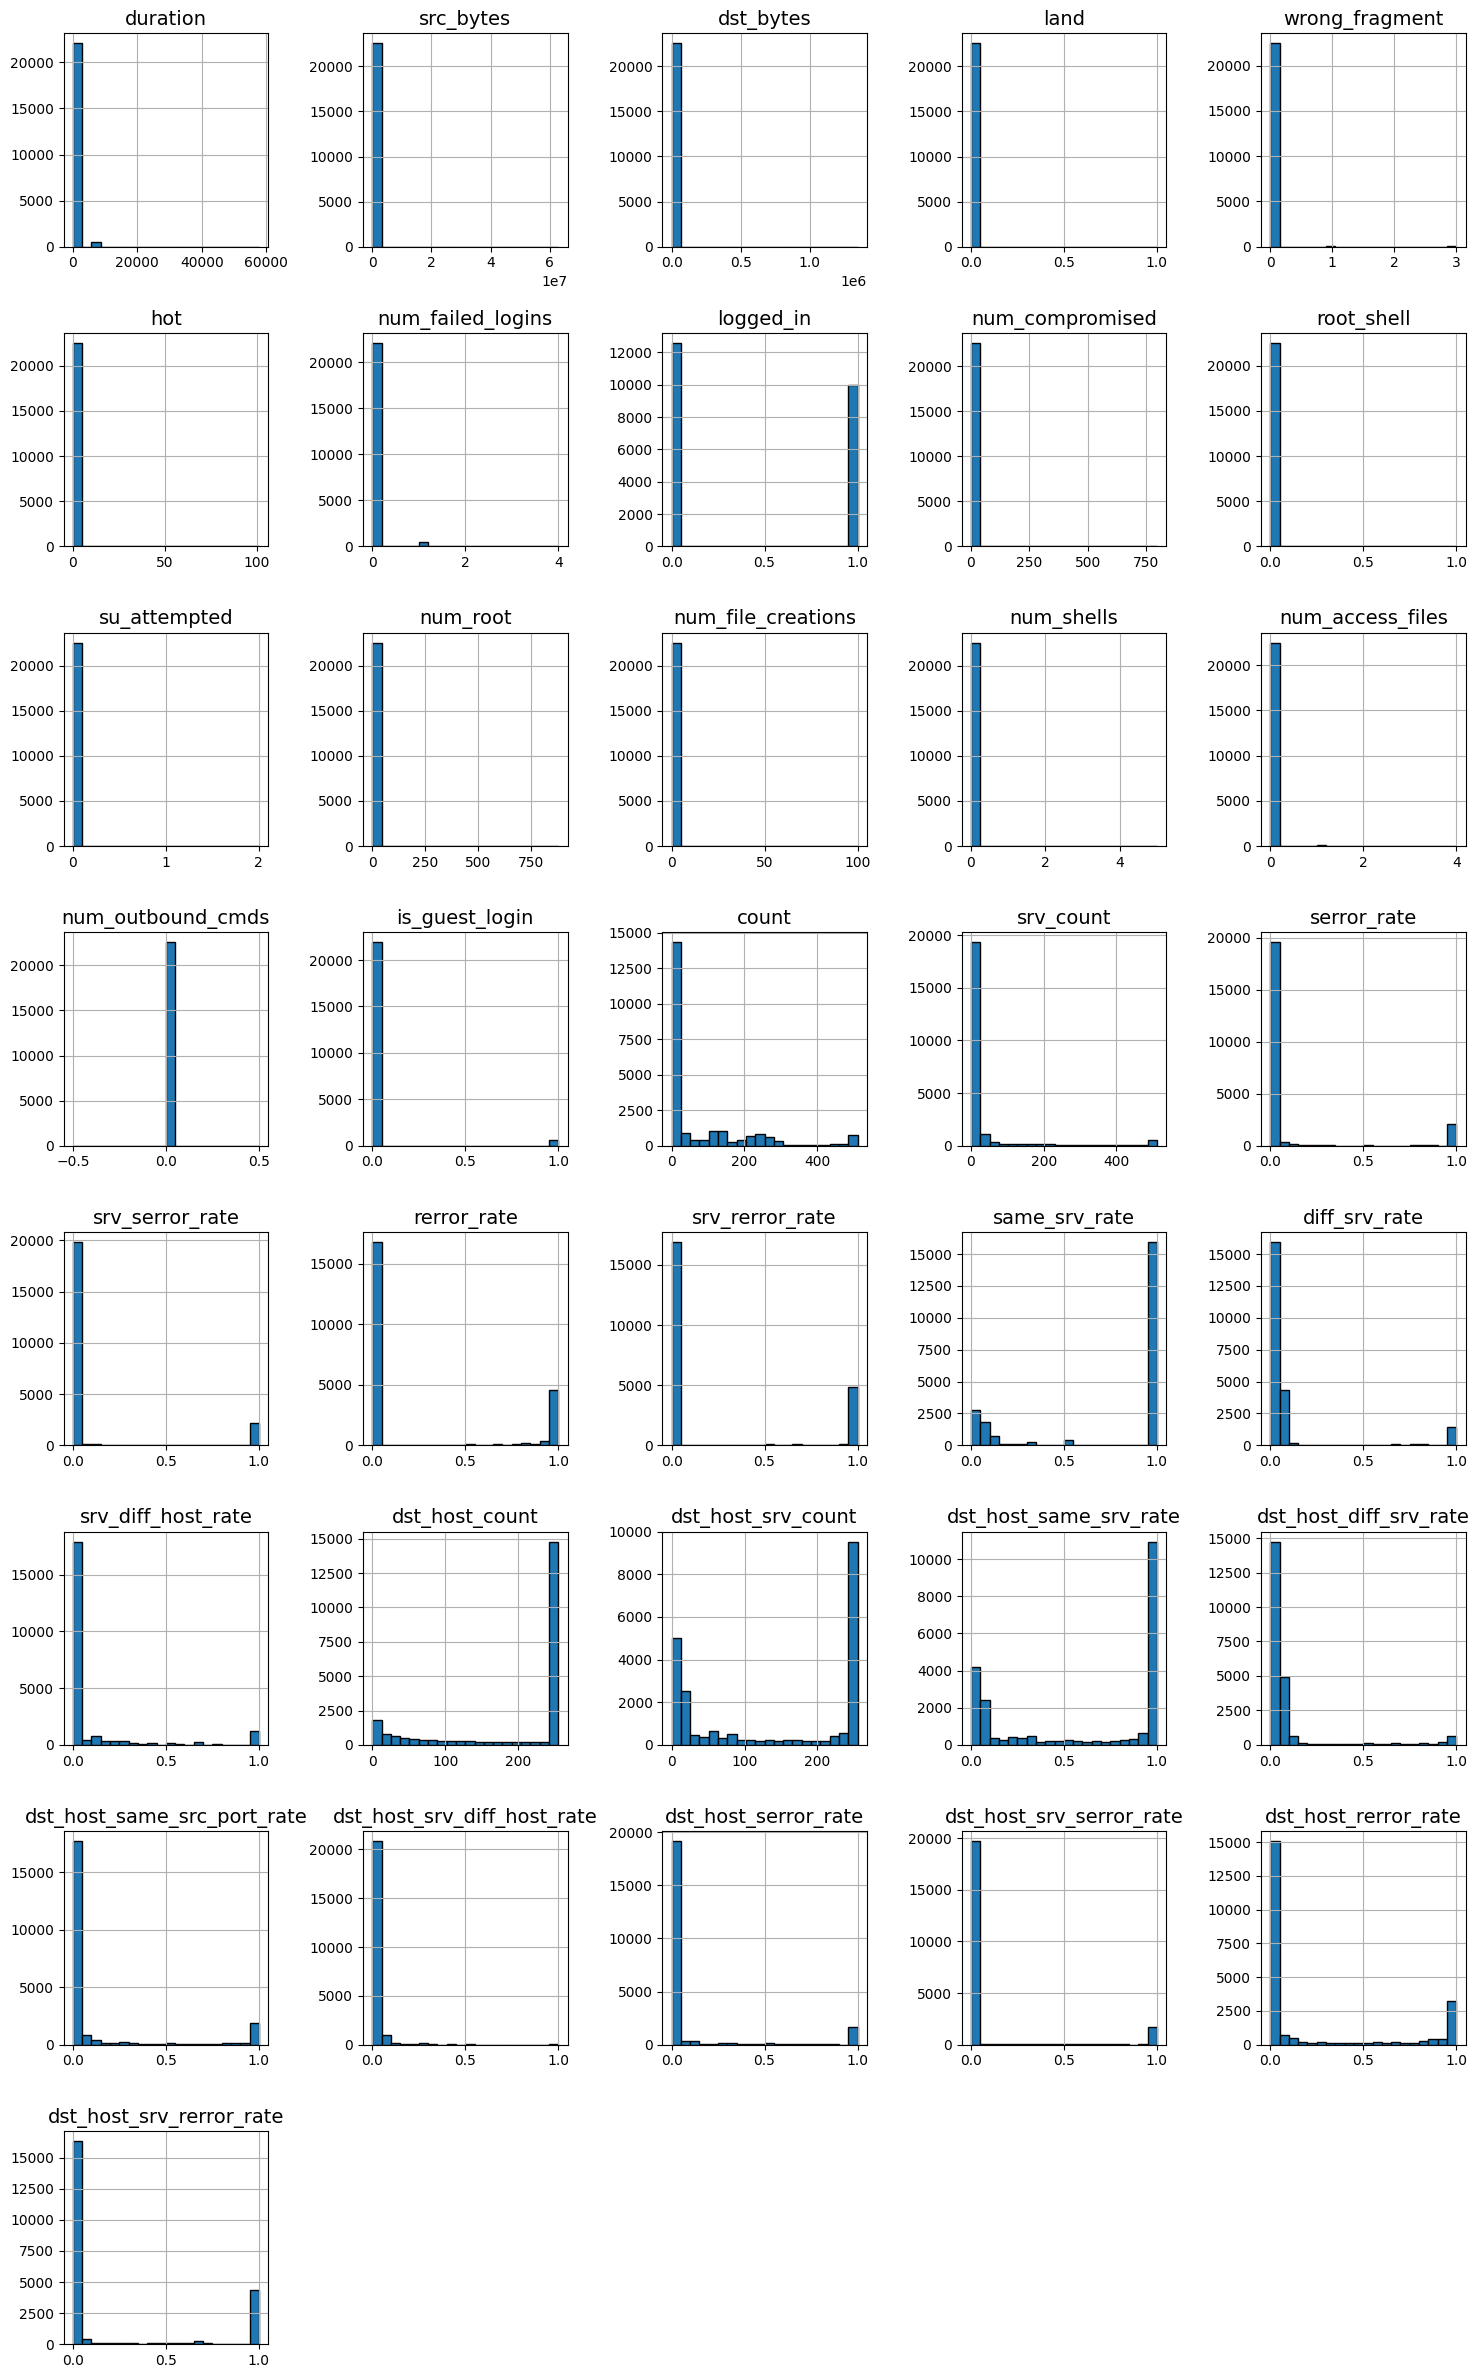

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Determine number of columns & rows for better layout
num_features = len(numeric_data.columns)
num_cols = 5  # Number of columns in the plot
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Auto-adjust rows

# Plot histograms
numeric_data.hist(bins=20, figsize=(15, num_rows * 3), layout=(num_rows, num_cols), edgecolor='black')

plt.tight_layout()  # Avoid overlapping
plt.show()


## Check for Missing values and fix those

In [16]:
import seaborn as sns
from sklearn.impute import SimpleImputer

# Checking for missing values before transformation
missing_values = data.isnull().sum()

print("\nMissing Values:")
print(missing_values[missing_values > 0])


# Handling missing values using median imputation
imputer = SimpleImputer(strategy='median')
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
print(len(imputer.statistics_))
imputer.transform(data[numeric_cols])


# Checking for missing values after transformation

# Checking for missing values
missing_values = data.isnull().sum()

print("\nMissing Values:")
print(missing_values[missing_values > 0])





Missing Values:
dst_host_count        13
dst_host_srv_count    12
dtype: int64
36

Missing Values:
Series([], dtype: int64)


## Target Class Distribution

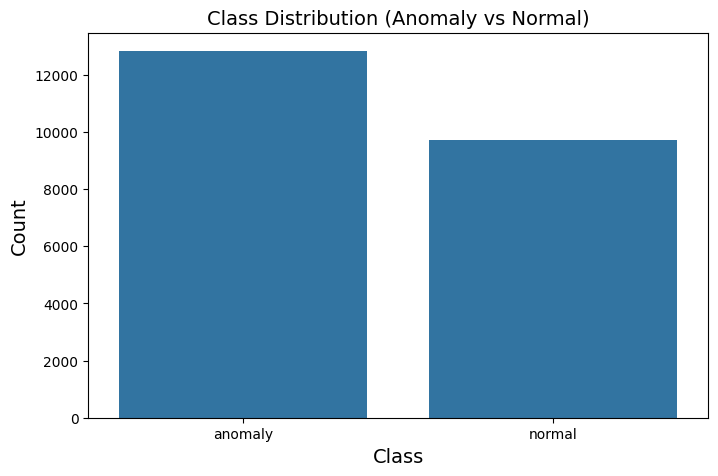

In [21]:
# Check class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=data)
plt.title("Class Distribution (Anomaly vs Normal)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



# Co-relation Analysis

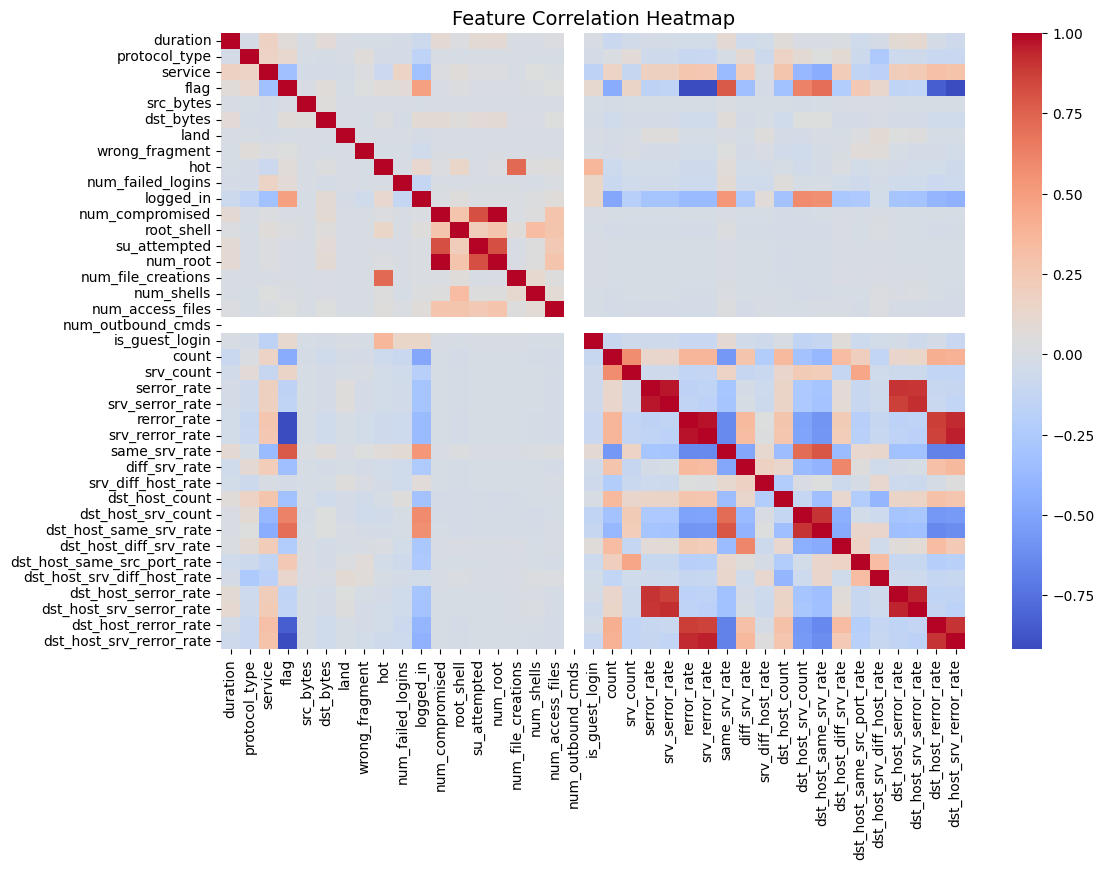

In [22]:

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()






# Categorial Feature Distributions

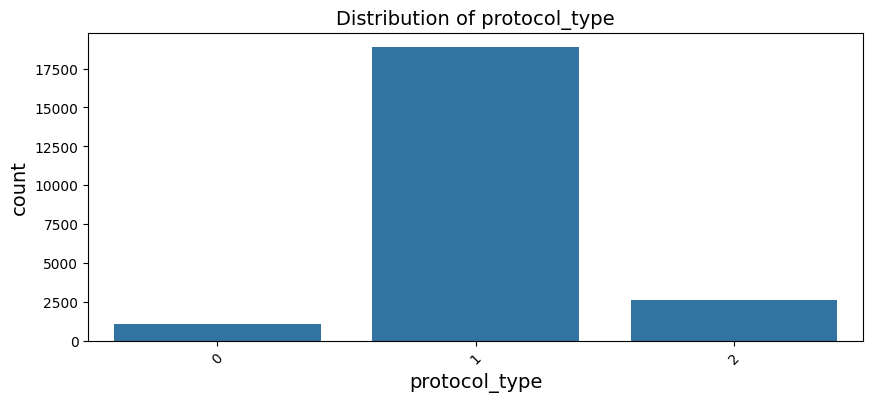

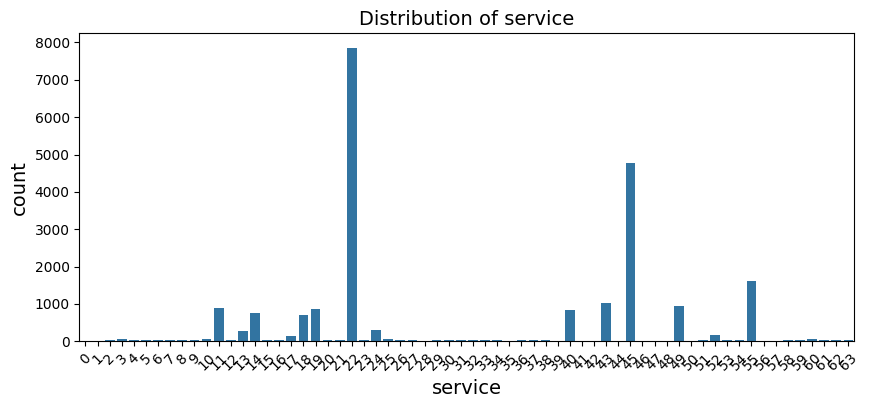

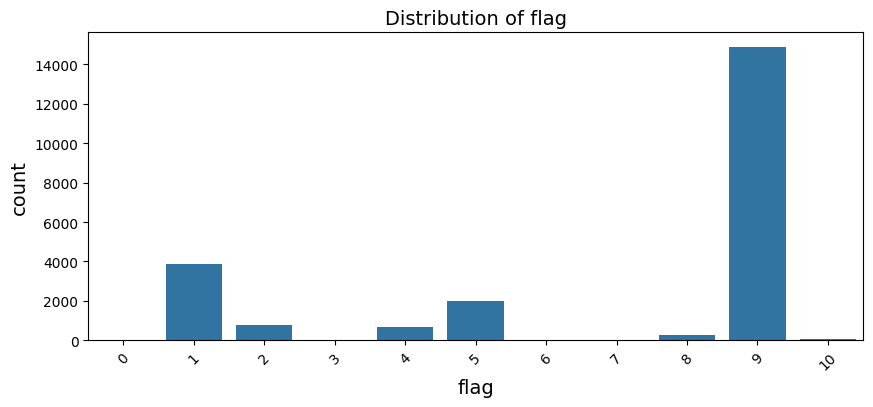

In [23]:


# Checking categorical feature distributions
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])